# import Module

In [191]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 전체 컬럼 출력하기
pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/players_21.csv')

In [192]:
df.shape

(18944, 106)

# EDA

In [193]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,1.794900e+04,18719.000000,18719.000000,1127.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,0.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,1.357070,65.677787,71.086729,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,4.296353e+06,20.589668,2021.983332,12.029281,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,NaN,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,27171.091056,4.697354,6.825672,7.057140,0.739327,7.002278,6.109985,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,1.005968e+07,17.057568,1.260426,6.674627,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.153057,19.592269,17.321709,14.572383,17.661569,18.787112,18.231204,17.239561,15.205281,16.598040,14.926452,14.689422,14.625189,9.112954,14.075215,13.330631,11.888479,15.878793,12.519775,19.305319,17.203045,20.738106,19.443738,13.724072,15.671721,12.118390,NaN,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,41.000000,16.000000,155.000000,50.000000,1.000000,47.000000,47.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,9.000000e+03,1.000000,2020.000000,1.000000,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000,45.000000,43.000000,35.000000,44.000000,12.000000,38.000000,6.000000,3.000000,5.000000,7.000000,3.000000,5.000000,4.000000,5.000000,5.000000,5.000000,13.000000,12.000000,14.000000,24.000000,12.000000,18.000000,15.000000,12.000000,16.000000,4.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.000000,NaN,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,210030.500000,21.000000,176.000000,70.000000,1.000000,61.000000,67.000000,3.000000e+05,1000.000000,1.000000,3.000000,2.000000,5.250000e+05,9.000000,2021.000000,6.000000,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000,60.000000,58.000000,57.000000,60.000000,28.000000,57.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,35.000000,31.000000

**축구선수들의 평균 신체적 능력**
- 나이 : 25세
- 키 : 181.1cm
- 몸무게 : 75kg
- 평균 임금 : 8,675유로 (약 천만원)


## Cleaning 
```
`sofifa_id`, `player_url`, `long_name`, `dob`, 'player_tags', `club_name`, `league_name`, `loaned_form`, `joined`, `contract_valid_until`, `nation_jersey_number`,`player_traits`, `defending_marking`, `nationality`
```

상위 특성들(features)은 다중공선성이 있거나 분석 및 예측에 불필요한 특징이라 판단하여 제거함.

- 긴이름(long_name)과 짧은 이름(short_name)이 겹치므로 제거함.
- 생일(dob)과 나이(age)가 특성이 겹치므로 제거함.
- 선수들의 국가팀(nationality)과 리그팀(leage)이 따로 존재하므로 분석에는 불필요하므로 제거함.
- player_tag는 다른 컬럼을 통해 수치적으로 알 수 있는 컬럼이고, 특수한 선수들에게만 '#tag'가 주어지기 때문에 제거함.

그외로, 선수들이 팀에 들어간 년도, 등번호 등이 있음.

In [194]:
del_features = ['player_url', 'long_name', 'dob', 'player_tags', 'club_name', 'league_name', 'loaned_from', 'joined', 'contract_valid_until', 'nation_jersey_number','player_traits','nationality', 'defending_marking','team_jersey_number','league_rank']
df = df.drop(del_features, axis=1)

In [195]:
df.head()

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,33,170,72,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,CAM,RW,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,LS,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,27,188,87,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,31,184,80,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,ST,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,28,175,68,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,LW,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


## Integration

분류(Classifier)과 회귀(Regression)에 따라 데이터를 어떻게 처리해야할 지 나눠지게 됨.

### Classifier
- team_position : 포지션들이 단일화 되어있고, 결측치는 255개임.
- nation_position : 결측치가 17,817개가 있음. 보통 선수들은 리그전에서 뽑힌 선수들을 국가전에 사용되는 것으로 알고 있음.
- player_position : 결측치는 없으나 중복되는 포지션이 있음.

> 우선, `Team_position`으로 데이터를 합치고 결측치는 `player_poition`에서 우선도가 높은 포지션을 채우기로 함.

### Regression
- value_eur : 선수들의 몸값
- wage_eur : 선수들의 임금 값
- release_clause_eur : 릴리즈 조항, 어떤 팀에서 선수가 강등을 당하거나 다른 선수를 필요로 할 때, 계약기간 없이 데리고 올 수 있는 최소 금액. (보통, NameValue가 있는 선수들에게만 해당.)

## Select Target data

### Classifer

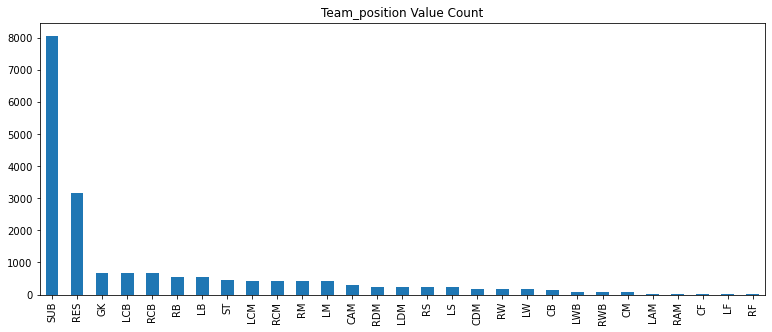

In [196]:
# 포지션 별 Value Count Bar 그래프 시각화
df['team_position'].value_counts().plot(kind='bar', figsize=[13,5], title='Team_position Value Count');

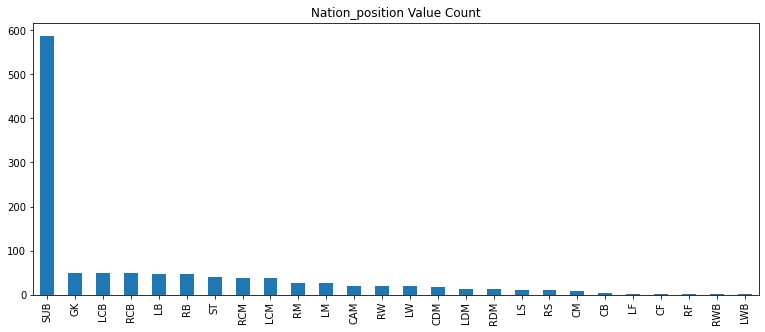

In [197]:
df['nation_position'].value_counts().plot(kind='bar', figsize=[13,5], title='Nation_position Value Count');

여전히 `SUB` 포지션 비율이 높다는 것을 확인할 수 있음. 이를 보완할 필요 있음.

In [198]:
df2 = df.copy() # 데이터프레임 복사

df_player_position = pd.DataFrame(df['player_positions'].str.split(',',3).tolist()) # 'player_position'의 ','를 제거
df['player_positions'] = df_player_position[0] # 가장 우선이 되는 포지션으로 변경

- `,` 구분자를 이용해 컬럼을 나눠 선정하지 않은 2개의 컬럼은 결측치가 80%가 넘으므로 제외함.
- `nation_position`은 다른 컬럼 보다 [SUB](https://en.wikipedia.org/wiki/Substitute_(association_football))선수가 많으므로 제외함.

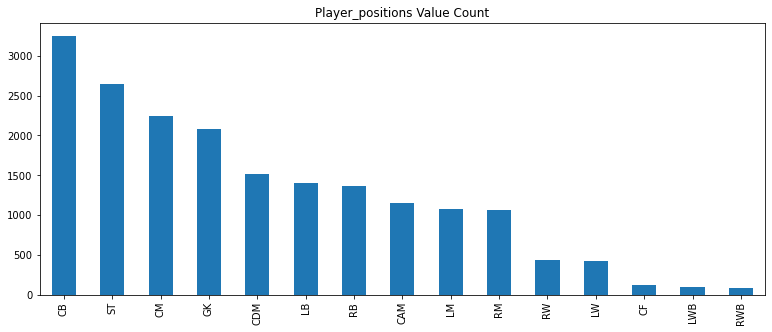

In [199]:
df['player_positions'].value_counts().plot(kind='bar', figsize=[13,5], title='Player_positions Value Count');

In [200]:
team_position_nan = df[df['team_position'].isna()] # 리그팀 포지션 결측치

In [201]:
df['team_position'][df['team_position'].isna()] = team_position_nan.loc[:,'player_positions'] # 포지션 채우기

In [202]:
df['team_position'].isna().sum()

0

In [203]:
df = df.drop(columns=['player_positions','nation_position']) # 다른 포지션 컬럼 제거

In [204]:
df.rename(columns={"team_position": "position"},inplace=True) # 이름 변경

In [205]:
df_position_index = df[df['position'] == 'SUB'] # 포지션이 SUB인 포지션

In [206]:
# Team Position(현 position) 컬럼에서 SUB이나 RES 값들을 player_position 컬럼의 우선 값으로 지정하여 변경한다.

df['position'][df['position'] == 'SUB']  = df2['player_positions'][df2['team_position'] == 'SUB']
df['position'][df['position'] == 'RES']  = df2['player_positions'][df2['team_position'] == 'RES']

In [207]:
df['position'] = pd.DataFrame(df['position'].str.split(',',3).tolist())[0]

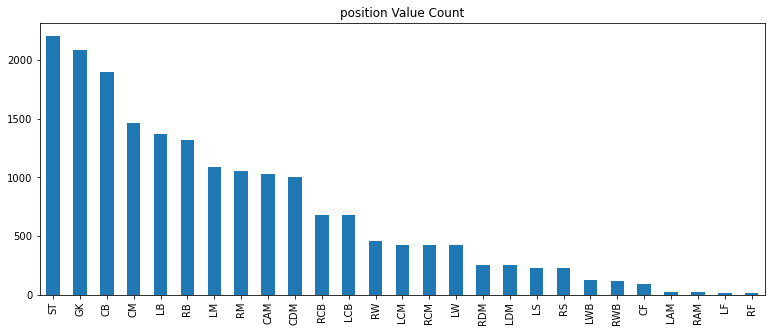

In [208]:
df['position'].value_counts().plot(kind='bar', figsize=[13,5], title='position Value Count');

In [209]:
df

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,33,170,72,93,93,67500000,560000,Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,27,188,87,91,93,75000000,125000,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,31,184,80,91,91,80000000,240000,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,ST,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,28,175,68,91,91,90000000,270000,Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,LW,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,47,52,40000,500,Right,1,2,2,Medium/Medium,Normal,No,91000.0,CM,63.0,37.0,50.0,47.0,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,44+2,44+2,44+2,47+0,45+0,45+0,45+0,47+0,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,21,177,70,47,52,35000,1000,Right,1,2,2,Low/Low,Normal,No,57000.0,CB,58.0,23.0,26.0,27.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,40,56,47,12,13,8,14,6,32+2,32+2

### Regression

In [210]:
df = df.drop(columns = 'release_clause_eur', axis=1) # 릴리즈 조항 제거
df

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,33,170,72,93,93,67500000,560000,Left,5,4,4,Medium/Low,Messi,Yes,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,Right,5,4,5,High/Low,C. Ronaldo,Yes,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,27,188,87,91,93,75000000,125000,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,31,184,80,91,91,80000000,240000,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,ST,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,28,175,68,91,91,90000000,270000,Right,5,5,5,High/Medium,Neymar,Yes,LW,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,47,52,40000,500,Right,1,2,2,Medium/Medium,Normal,No,CM,63.0,37.0,50.0,47.0,41.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,44+2,44+2,44+2,47+0,45+0,45+0,45+0,47+0,47+2,47+2,47+2,48+2,47+2,47+2,47+2,48+2,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,21,177,70,47,52,35000,1000,Right,1,2,2,Low/Low,Normal,No,CB,58.0,23.0,26.0,27.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,40,56,47,12,13,8,14,6,32+2,32+2,32+2,30+0,30+0,30+0,30+0,30+0,29+2,29+2,29+2,31+2,32+2,32+2,32+2,31+2,42+2,41+2,41+2,41+2,42+2,45

# Profiling

판다스 프로파일링을 통해 간단한 EDA View를 확인해봄.
```
!pip install pandas-profiling==2.7.1
```

In [211]:
data = df.copy()

In [212]:
# from pandas_profiling import ProfileReport

# df_report = ProfileReport(df)
# df_report.to_file('./profile_report.html')

# Feature Engineering

In [213]:
data.head()

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,33,170,72,93,93,67500000,560000,Left,5,4,4,Medium/Low,Messi,Yes,CAM,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,35,187,83,92,92,46000000,220000,Right,5,4,5,High/Low,C. Ronaldo,Yes,LS,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,27,188,87,91,93,75000000,125000,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,31,184,80,91,91,80000000,240000,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,ST,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,28,175,68,91,91,90000000,270000,Right,5,5,5,High/Medium,Neymar,Yes,LW,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


### overall
- 설명 : overall 과 potential은 기존 선수의 점수와 잠재성을 나타낸 것임.

> 잠재성을 기존 점수 + 잠재성 대신에 추가된 잠재성의 값만 표기함.

In [214]:
data['potential'] = data['potential'] - data['overall']

### work_rate
- 설명 : 공격 / 수비 비율이 한 특성으로 이루어져 있음. e.g._Medium/Low, High/Low_
- 특징 : 중간 / 중간이라는 비율의 선수들이 많이 높음.

> 공격 비율과 수비 비율 특성, 두가지 특성으로 나눔.

In [215]:
data['work_rate'].value_counts(normalize=True)

Medium/Medium    0.526816
High/Medium      0.182380
Medium/High      0.094911
High/High        0.054424
Medium/Low       0.048195
High/Low         0.041491
Low/Medium       0.025443
Low/High         0.023543
Low/Low          0.002798
Name: work_rate, dtype: float64

In [216]:
data['work_rate'].isna().sum() # 결측치는 없음.

0

In [217]:
work_rate = pd.DataFrame(data['work_rate'].str.split('/',2).tolist()).rename({0:'work_rate_attaking', 1: 'work_rate_defensive'},axis=1)
# 공격과 수비 두 비율의 데이터 프레임으로 바꿈

data['work_rate_Attaking'] = work_rate['work_rate_attaking'] # 공격 비율
data['work_rate_defensive'] = work_rate['work_rate_defensive'] # 수비 비율

In [218]:
data = data.drop('work_rate', axis=1)

### body_type
- 설명 : 선수들의 체형은 Normal  / Lean / Stokcy / PLAYER_BODY_TYPE_n / 유니크한 선수들 이름 으로 이루어져있음.

> - PLAYER_BODY_TYPE_N으로 되어있는 선수들은 Normal 체형으로 통일화 함. 
> - 선수들의 이름으로 이루어진 체형들은 Unique라는 특성으로 범주를 통일시킴.

In [219]:
data['body_type'].value_counts()

Normal                  11264
Lean                     6490
Stocky                   1075
PLAYER_BODY_TYPE_286        1
PLAYER_BODY_TYPE_318        1
                        ...  
PLAYER_BODY_TYPE_266        1
PLAYER_BODY_TYPE_305        1
PLAYER_BODY_TYPE_253        1
PLAYER_BODY_TYPE_345        1
Akinfenwa                   1
Name: body_type, Length: 118, dtype: int64

In [220]:
data['body_type'] = data['body_type'].str[:16]  # 'PLAYER_BODY_TYPE_266'에서 266만 제거하는 문자열 수정
data['body_type'][(data['body_type'] != 'Normal') &
                  (data['body_type'] != 'Stocky') &
                  (data['body_type'] != 'Lean') &
                  (data['body_type'] != 'PLAYER_BODY_TYPE')] = 'Unique' # 이외 해당하지 않는 특수한 선수 데이터는 'Unique'한 데이터로 설정

In [221]:
data['body_type'][(data['body_type'] != 'Normal') &
                  (data['body_type'] != 'Stocky') &
                  (data['body_type'] != 'Lean') &
                  (data['body_type'] != 'PLAYER_BODY_TYPE')] = 'Unique'

In [222]:
data['body_type'] = data['body_type'].replace('PLAYER_BODY_TYPE','Normal') # 'PLAYER_BODY_TYPE'인 선수들은 Normal로 바꾼다.
data['body_type'].value_counts()

Normal    11372
Lean       6490
Stocky     1075
Unique        7
Name: body_type, dtype: int64

### ls ~ rb
- 설명 : ls 부터 rb까지는 선수들의 기존 능력치에 +n 만큼 잠재력을 추가한 것임.
- for 문을 통해 아래와 같이 성장값(grow)과 기존 값(value)으로 열을 나누기로 함.
> 21+3 => value = 21, grow = 3

In [223]:
data_pos_score = data.iloc[:, 61:87] # '능력치 + n' 특성

In [224]:
for n in range(len(data_pos_score.columns)):
    # '+' 구분자를 중심으로 기존 값과 성장값으로 나눔 
  data[f'{data_pos_score.columns[n].upper()}_value'] = pd.DataFrame(data_pos_score.iloc[:,n].str.split('+',2).tolist())[0].astype(int)
  data[f'{data_pos_score.columns[n].upper()}_grow'] = pd.DataFrame(data_pos_score.iloc[:,n].str.split('+',2).tolist())[1]
  # ''인 데이터들은 0으로 값을 변경함.  
  data[f'{data_pos_score.columns[n].upper()}_grow'][data[f'{data_pos_score.columns[n].upper()}_grow'] == ''] = 0
  data[f'{data_pos_score.columns[n].upper()}_grow'] = data[f'{data_pos_score.columns[n].upper()}_grow'].astype(int)

In [225]:
data.drop(columns = data.iloc[:,61:87], axis=1,inplace=True) # 기존에 있었던 특성들은 제거 함.

In [226]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,LS_value,LS_grow,ST_value,ST_grow,RS_value,RS_grow,LW_value,LW_grow,LF_value,LF_grow,CF_value,CF_grow,RF_value,RF_grow,RW_value,RW_grow,LAM_value,LAM_grow,CAM_value,CAM_grow,RAM_value,RAM_grow,LM_value,LM_grow,LCM_value,LCM_grow,CM_value,CM_grow,RCM_value,RCM_grow,RM_value,RM_grow,LWB_value,LWB_grow,LDM_value,LDM_grow,CDM_value,CDM_grow,RDM_value,RDM_grow,RWB_value,RWB_grow,LB_value,LB_grow,LCB_value,LCB_grow,CB_value,CB_grow,RCB_value,RCB_grow,RB_value,RB_grow
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,18944.000000,18944.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.0,18944.000000,18944.0,18944.000000,18944.0,18944.000000,18944.0,18944.000000,18944.0,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,226242.402872,25.225823,181.190773,75.016892,65.677787,5.408942,2.224813e+06,8675.852513,1.091850,2.936603,2.363017,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988,65.164186,62.889102,61.719635,66.108017,37.203553,63.171867,49.612859,45.796083,51.874578,58.705448,42.669552,55.546400,47.187289,42.356155,52.653030,58.482791,64.285103,64.326489,63.333193,61.609428,63.918549,57.752798,64.590530,62.596020,64.742927,46.758763,55.488862,46.250000,50.255807,53.828231,48.050412,57.978674,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,54.627956,1.874472,54.627956,1.874472,54.627956,1.874472,55.602618,0.0,55.483266,0.0,55.483266,0.0,55.483266,0.0,55.602618,0.0,55.813345,1.864073,55.813345,1.864073,55.813345,1.864073,56.324852,1.867979,55.092430,1.918866,55.092430,1.918866,55.092430,1.918866,56.324852,1.867979,53.969436,1.961149,53.562606,1.934333,53.562606,1.934333,53.562606,1.934333,53.969436,1.961149,53.276077,1.988862,52.289168,1.843011,52.289168,1.843011,52.289168,1.843011,53.276077,1.988862
std,27171.091056,4.697354,6.825672,7.057140,7.002278,5.649024,5.102486e+06,19654.774894,0.361841,0.667132,0.766469,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706,7.710474,7.328945,7.575184,8.126601,10.714523,8.565969,18.

### goalkeeper Data
- `pace`,	`shooting`,	`passing`	,`dribbling`	,`defending`	,`physic` 열에 있는 결측치는 골기퍼들의 데이터임.

- 골기퍼 관련 데이터들은 반대로 골기퍼 포지션 선수들의 데이터 밖에 없음.

```
!pip install plotly
```

In [227]:
# import missingno as msno
# plot = msno.heatmap(df, cmap='Blues', fontsize=35)

# fig = plot.figure

# fig.set_size_inches(40, 20)
# fig.suptitle('The relationship between goalkeeper and other abilities', fontsize= 55)
# fig.set_tight_layout(True)

골키퍼와 다른 능력 사이의 연관성으로 보게되면 결측치가 있는 데이터는 골기퍼 선수 밖에 없음을 알 수 있음.

In [228]:
pd.DataFrame(data[['gk_diving','goalkeeping_diving']])

,gk_diving,goalkeeping_diving
0,NaN,6
1,NaN,7
2,87.0,87
3,NaN,15
4,NaN,9
...,...,...
18939,NaN,10
18940,NaN,12
18941,NaN,12
18942,NaN,15


In [229]:
data.drop(data.iloc[:,22:28], inplace=True, axis=1)

In [230]:
data

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,work_rate_Attaking,work_rate_defensive,LS_value,LS_grow,ST_value,ST_grow,RS_value,RS_grow,LW_value,LW_grow,LF_value,LF_grow,CF_value,CF_grow,RF_value,RF_grow,RW_value,RW_grow,LAM_value,LAM_grow,CAM_value,CAM_grow,RAM_value,RAM_grow,LM_value,LM_grow,LCM_value,LCM_grow,CM_value,CM_grow,RCM_value,RCM_grow,RM_value,RM_grow,LWB_value,LWB_grow,LDM_value,LDM_grow,CDM_value,CDM_grow,RDM_value,RDM_grow,RWB_value,RWB_grow,LB_value,LB_grow,LCB_value,LCB_grow,CB_value,CB_grow,RCB_value,RCB_grow,RB_value,RB_grow
0,158023,L. Messi,33,170,72,93,0,67500000,560000,Left,5,4,4,Unique,Yes,CAM,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,Medium,Low,89,3,89,3,89,3,92,0,93,0,93,0,93,0,92,0,93,0,93,0,93,0,91,2,87,3,87,3,87,3,91,2,66,3,65,3,65,3,65,3,66,3,62,3,52,3,52,3,52,3,62,3
1,20801,Cristiano Ronaldo,35,187,83,92,0,46000000,220000,Right,5,4,5,Unique,Yes,LS,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,High,Low,91,1,91,1,91,1,89,0,91,0,91,0,91,0,89,0,88,3,88,3,88,3,88,3,81,3,81,3,81,3,88,3,65,3,61,3,61,3,61,3,65,3,61,3,54,3,54,3,54,3,61,3
2,200389,J. Oblak,27,188,87,91,2,75000000,125000,Right,3,3,1,Normal,Yes,GK,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,Medium,Medium,33,3,33,3,33,3,32,0,35,0,35,0,35,0,32,0,38,3,38,3,38,3,35,3,38,3,38,3,38,3,35,3,32,3,36,3,36,3,36,3,32,3,32,3,33,3,33,3,33,3,32,3
3,188545,R. Lewandowski,31,184,80,91,0,80000000,240000,Right,4,4,4,Normal,Yes,ST,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,High,Medium,89,2,89,2,89,2,85,0,87,0,87,0,87,0,85,0,85,3,85,3,85,3,83,3,79,3,79,3,79,3,83,3,64,3,65,3,65,3,65,3,64,3,61,3,60,3,60,3,60,3,61,3
4,190871,Neymar Jr,28,175,68,91,0,90000000,270000,Right,5,5,5,Unique,Yes,LW,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,High,Medium,84,3,84,3,84,3,90,0,89,0,89,0,89,0,90,0,90,1,90,1,90,1,90,1,83,3,83,3,83,3,90,1,67,3,62,3,62,3,62,3,67,3,62,3,49,3,49,3,49,3,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,47,5,40000,500,Right,1,2,2,Normal,No,CM,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,Medium,Medium,44,2,44,2,44,2,47,0,45,0,45,0,45,0,47,0,47,2,47,2,47,2,48,2,47,2,47,2,47,2,48,2,47,2,47,2,47,2,47,2,47,2,47,2,46,2,46,2,46,2,47,2
18940,257710,Zhang Mengxuan,21,177,70,47,5,35000,1000,Right,1,2,2,Normal,No,CB,58.0,23.0,26.0,27.0,50.0,48.0,23,1

In [231]:
data[data['position'] == 'GK'] = data[data['position'] == 'GK'].fillna(0)

In [232]:
data

,sofifa_id,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,body_type,real_face,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,work_rate_Attaking,work_rate_defensive,LS_value,LS_grow,ST_value,ST_grow,RS_value,RS_grow,LW_value,LW_grow,LF_value,LF_grow,CF_value,CF_grow,RF_value,RF_grow,RW_value,RW_grow,LAM_value,LAM_grow,CAM_value,CAM_grow,RAM_value,RAM_grow,LM_value,LM_grow,LCM_value,LCM_grow,CM_value,CM_grow,RCM_value,RCM_grow,RM_value,RM_grow,LWB_value,LWB_grow,LDM_value,LDM_grow,CDM_value,CDM_grow,RDM_value,RDM_grow,RWB_value,RWB_grow,LB_value,LB_grow,LCB_value,LCB_grow,CB_value,CB_grow,RCB_value,RCB_grow,RB_value,RB_grow
0,158023,L. Messi,33,170,72,93,0,67500000,560000,Left,5,4,4,Unique,Yes,CAM,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,Medium,Low,89,3,89,3,89,3,92,0,93,0,93,0,93,0,92,0,93,0,93,0,93,0,91,2,87,3,87,3,87,3,91,2,66,3,65,3,65,3,65,3,66,3,62,3,52,3,52,3,52,3,62,3
1,20801,Cristiano Ronaldo,35,187,83,92,0,46000000,220000,Right,5,4,5,Unique,Yes,LS,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,High,Low,91,1,91,1,91,1,89,0,91,0,91,0,91,0,89,0,88,3,88,3,88,3,88,3,81,3,81,3,81,3,88,3,65,3,61,3,61,3,61,3,65,3,61,3,54,3,54,3,54,3,61,3
2,200389,J. Oblak,27,188,87,91,2,75000000,125000,Right,3,3,1,Normal,Yes,GK,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,Medium,Medium,33,3,33,3,33,3,32,0,35,0,35,0,35,0,32,0,38,3,38,3,38,3,35,3,38,3,38,3,38,3,35,3,32,3,36,3,36,3,36,3,32,3,32,3,33,3,33,3,33,3,32,3
3,188545,R. Lewandowski,31,184,80,91,0,80000000,240000,Right,4,4,4,Normal,Yes,ST,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,High,Medium,89,2,89,2,89,2,85,0,87,0,87,0,87,0,85,0,85,3,85,3,85,3,83,3,79,3,79,3,79,3,83,3,64,3,65,3,65,3,65,3,64,3,61,3,60,3,60,3,60,3,61,3
4,190871,Neymar Jr,28,175,68,91,0,90000000,270000,Right,5,5,5,Unique,Yes,LW,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,High,Medium,84,3,84,3,84,3,90,0,89,0,89,0,89,0,90,0,90,1,90,1,90,1,90,1,83,3,83,3,83,3,90,1,67,3,62,3,62,3,62,3,67,3,62,3,49,3,49,3,49,3,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,47,5,40000,500,Right,1,2,2,Normal,No,CM,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,Medium,Medium,44,2,44,2,44,2,47,0,45,0,45,0,45,0,47,0,47,2,47,2,47,2,48,2,47,2,47,2,47,2,48,2,47,2,47,2,47,2,47,2,47,2,47,2,46,2,46,2,46,2,47,2
18940,257710,Zhang Mengxuan,21,177,70,47,5,35000,1000,Right,1,2,2,Normal,No,CB,58.0,23.0,26.0,27.0,50.0,48.0,23,1

## Feature Selection

### 수비&공격 점수 수동 인코딩 하기

In [233]:
# 수비
data.loc[data['work_rate_defensive']=='Low', ['work_rate_defensive']] = 1
data.loc[data['work_rate_defensive']=='Medium', ['work_rate_defensive']] = 2
data.loc[data['work_rate_defensive']=='High', ['work_rate_defensive']] = 3

# 공격
data.loc[data['work_rate_Attaking']=='Low', ['work_rate_Attaking']] = 1
data.loc[data['work_rate_Attaking']=='Medium', ['work_rate_Attaking']] = 2
data.loc[data['work_rate_Attaking']=='High', ['work_rate_Attaking']] = 3

### 분류 & 회귀에 사용할 특성 선택하기
- `np.concatenate`를 이용하여 카테고리형 변수(ccategorical)와 연속형 변수(numeric)로 나눔.
- 분류용, 회귀용 특성을 만듬.


#### 분류용 특성

In [234]:
skill_set = data.iloc[:,15:].drop(columns=['work_rate_Attaking','work_rate_defensive']).columns

In [235]:
cls_categorical = ['preferred_foot', 'work_rate_Attaking','work_rate_defensive','body_type']
cls_numeric = np.concatenate([skill_set, ['age','height_cm','weight_kg','overall','potential','weak_foot','skill_moves']], axis=0)
cls_features = np.concatenate([cls_categorical, cls_numeric], axis=0)

In [236]:
cls_data = data[cls_features]

In [237]:
cls_data2 = cls_data.copy()

#### 회귀용 특성

In [248]:
reg_numeric = np.concatenate([['international_reputation'], cls_numeric], axis=0)
reg_features = np.concatenate([cls_categorical, reg_numeric,['value_eur','wage_eur']], axis=0)

In [249]:
reg_data = data[reg_features]

In [250]:
reg_data

,preferred_foot,work_rate_Attaking,work_rate_defensive,body_type,international_reputation,position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,LS_value,LS_grow,ST_value,ST_grow,RS_value,RS_grow,LW_value,LW_grow,LF_value,LF_grow,CF_value,CF_grow,RF_value,RF_grow,RW_value,RW_grow,LAM_value,LAM_grow,CAM_value,CAM_grow,RAM_value,RAM_grow,LM_value,LM_grow,LCM_value,LCM_grow,CM_value,CM_grow,RCM_value,RCM_grow,RM_value,RM_grow,LWB_value,LWB_grow,LDM_value,LDM_grow,CDM_value,CDM_grow,RDM_value,RDM_grow,RWB_value,RWB_grow,LB_value,LB_grow,LCB_value,LCB_grow,CB_value,CB_grow,RCB_value,RCB_grow,RB_value,RB_grow,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,value_eur,wage_eur
0,Left,2,1,Unique,5,CAM,85.0,92.0,91.0,95.0,38.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,35,24,6,11,15,14,8,89,3,89,3,89,3,92,0,93,0,93,0,93,0,92,0,93,0,93,0,93,0,91,2,87,3,87,3,87,3,91,2,66,3,65,3,65,3,65,3,66,3,62,3,52,3,52,3,52,3,62,3,33,170,72,93,0,4,4,67500000,560000
1,Right,3,1,Unique,5,LS,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,32,24,7,11,15,14,11,91,1,91,1,91,1,89,0,91,0,91,0,91,0,89,0,88,3,88,3,88,3,88,3,81,3,81,3,81,3,88,3,65,3,61,3,61,3,61,3,65,3,61,3,54,3,54,3,54,3,61,3,35,187,83,92,0,4,5,46000000,220000
2,Right,2,2,Normal,3,GK,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,12,18,87,92,78,90,90,33,3,33,3,33,3,32,0,35,0,35,0,35,0,32,0,38,3,38,3,38,3,35,3,38,3,38,3,38,3,35,3,32,3,36,3,36,3,36,3,32,3,32,3,33,3,33,3,33,3,32,3,27,188,87,91,2,3,1,75000000,125000
3,Right,3,2,Normal,4,ST,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,42,19,15,6,12,8,10,89,2,89,2,89,2,85,0,87,0,87,0,87,0,85,0,85,3,85,3,85,3,83,3,79,3,79,3,79,3,83,3,64,3,65,3,65,3,65,3,64,3,61,3,60,3,60,3,60,3,61,3,31,184,80,91,0,4,4,80000000,240000
4,Right,3,2,Unique,5,LW,91.0,85.0,86.0,94.0,36.0,59.0,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,30,29,9,9,15,15,11,84,3,84,3,84,3,90,0,89,0,89,0,89,0,90,0,90,1,90,1,90,1,90,1,83,3,83,3,83,3,90,1,67,3,62,3,62,3,62,3,67,3,62,3,49,3,49,3,49,3,62,3,28,175,68,91,0,5,5,90000000,270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Right,2,2,Normal,1,CM,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,36,39,54,10,9,14,6,6,44,2,44,2,44,2,47,0,45,0,45,0,45,0,47,0,47,2,47,2,47,2,48,2,47,2,47,2,47,2,48,2,47,2,47,2,47,2,47,2,47,2,47,2,46,2,46,2,46,2,47,2,24,176,73,47,5,2,2,40000,500
18940,Right,1,1,Normal,1,CB,58.0,23.0,26.0,27.0,50.0,48.0,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,40,56,47,12,13,8,14,6,32,2,32,2,32,2,30,0,30,0,30,0,30,0,30,0,29,2,29,2,29,2,31,2,32,2,32,2,32,2,31,2,42,2,41,2,41,2,41,2,42,2,45,2,47,2,47,2,47,2,45,2,21,177,70,47,5,2,2,35000,1000
18941,Right,1,2,Normal,1

In [251]:
reg_data.to_csv('../data/reg_data.csv', index=False)

### 포지션 재정리

In [162]:
# data['position'].value_counts()
data['position'].nunique()

27

#### 4개의 다중 클래스의 경우

In [178]:
# 공격수
cls_data.loc[cls_data['position']=='ST', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='LS', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='RS', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='RF', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='LF', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='CF', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='LW', ['position']] = 'Attack'
cls_data.loc[cls_data['position']=='RW', ['position']] = 'Attack'

# 골기퍼
cls_data.loc[cls_data['position']=='GK', ['position']] = 'Goalkeeper'

# 미드필더
cls_data.loc[cls_data['position']=='CAM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='LAM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='RAM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='AM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='LM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='RM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='CM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='LCM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='RCM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='CDM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='LDM', ['position']] = 'Middle'
cls_data.loc[cls_data['position']=='RDM', ['position']] = 'Middle'

# 수비수
cls_data.loc[cls_data['position']=='LWB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='RWB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='CB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='LCB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='RCB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='LB', ['position']] = 'Defence'
cls_data.loc[cls_data['position']=='RB', ['position']] = 'Defence'



In [179]:
cls_data['position'].value_counts()

Middle        7024
Defence       6189
Attack        3647
Goalkeeper    2084
Name: position, dtype: int64

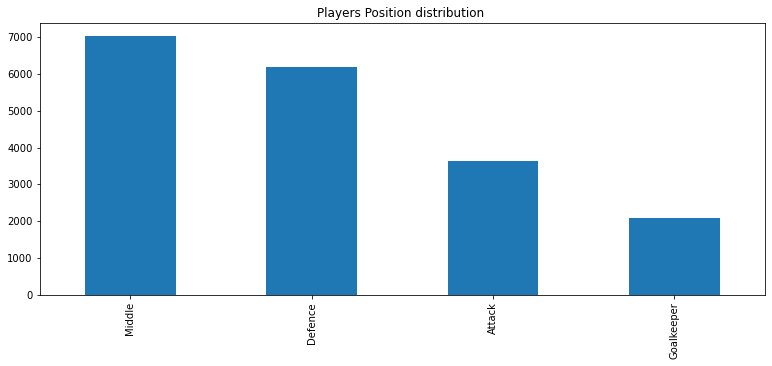

In [180]:
cls_data['position'].value_counts().plot(kind='bar', figsize=[13,5], title='Players Position distribution ');

In [190]:
cls_data.to_csv('../data/cls_data_4p.csv', index=False)

#### 11개의 다중클래스의 경우


In [181]:
cls_data2.loc[cls_data2['position']=='ST', ['position']] = 'central_attack'
cls_data2.loc[cls_data2['position']=='LS', ['position']] = 'left_attack'
cls_data2.loc[cls_data2['position']=='RS', ['position']] = 'right_attack'
cls_data2.loc[cls_data2['position']=='RF', ['position']] = 'right_attack'
cls_data2.loc[cls_data2['position']=='LF', ['position']] = 'left_attack'
cls_data2.loc[cls_data2['position']=='CF', ['position']] = 'central_attack'
cls_data2.loc[cls_data2['position']=='LW', ['position']] = 'left_attack'
cls_data2.loc[cls_data2['position']=='RW', ['position']] = 'right_attack'

# 골기퍼
cls_data2.loc[cls_data2['position']=='GK', ['position']] = 'goalkeeper'

# 미드필더
cls_data2.loc[cls_data2['position']=='CAM', ['position']] = 'central_middle'
cls_data2.loc[cls_data2['position']=='LAM', ['position']] = 'left_middle'
cls_data2.loc[cls_data2['position']=='RAM', ['position']] = 'right_middle'
cls_data2.loc[cls_data2['position']=='AM', ['position']] = 'attacking_middle'
cls_data2.loc[cls_data2['position']=='LM', ['position']] = 'left_middle'
cls_data2.loc[cls_data2['position']=='RM', ['position']] = 'right_middle'
cls_data2.loc[cls_data2['position']=='CM', ['position']] = 'central_middle'
cls_data2.loc[cls_data2['position']=='LCM', ['position']] = 'left_middle'
cls_data2.loc[cls_data2['position']=='RCM', ['position']] = 'right_middle'
cls_data2.loc[cls_data2['position']=='CDM', ['position']] = 'defence_middle'
cls_data2.loc[cls_data2['position']=='LDM', ['position']] = 'left_middle'
cls_data2.loc[cls_data2['position']=='RDM', ['position']] = 'right_middle'

# 수비수
cls_data2.loc[cls_data2['position']=='LWB', ['position']] = 'left_defence'
cls_data2.loc[cls_data2['position']=='RWB', ['position']] = 'right_defence'
cls_data2.loc[cls_data2['position']=='CB', ['position']] = 'central_defence'
cls_data2.loc[cls_data2['position']=='LCB', ['position']] = 'left_defence'
cls_data2.loc[cls_data2['position']=='RCB', ['position']] = 'right_defence'
cls_data2.loc[cls_data2['position']=='LB', ['position']] = 'left_defence'
cls_data2.loc[cls_data2['position']=='RB', ['position']] = 'right_defence'

In [182]:
cls_data2['position'].value_counts()

central_middle     2487
central_attack     2292
left_defence       2175
right_defence      2117
goalkeeper         2084
central_defence    1897
left_middle        1784
right_middle       1752
defence_middle     1001
right_attack        693
left_attack         662
Name: position, dtype: int64

In [183]:
cls_data2['position'].nunique()

11

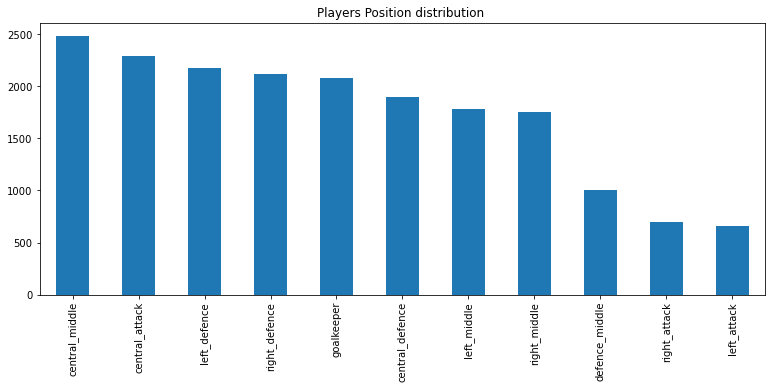

In [184]:
cls_data2['position'].value_counts().plot(kind='bar', figsize=[13,5], title='Players Position distribution ');

In [188]:
cls_data2.to_csv('../data/cls_data_11p.csv', index=False)